# **Malaria Detection** EDIT

##<b>Problem Definition</b>
**The context:** Malaria is a life-threatening disease spread to humans by some types of mosquitoes. In 2021, nearly half of the world's population was at risk of malaria. There were an estimated 247 million cases of malaria worldwide.<br>
**The objectives:** Early identification of disease increase the treatment opportunities. I will run different Machine Learning models using python and find the best design solution to help the faster detection of Malaria by processing blood cell images.<br>
**The key questions:** Using the blood cell images and data science modeling, I aim to define if the cell image is parasitized or uninfected.<br>
**The problem formulation:** Design a Machine Learning Model that will assist doctors to identify if the person has malaria disease or not.

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Load the data</b>

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# Run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:

            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                train_labels.append(1)

            else:

                train_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
train_images[0][0][0]
#train_labels[0][0]

array([0, 0, 0], dtype=uint8)

In [ ]:
# Storing the path of the extracted "test" folder
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# Run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [ ]:
# Shape of images
train_images.shape

(24958, 64, 64, 3)

In [ ]:
#Shape of test images
test_images.shape

(2600, 64, 64, 3)

###<b> Checking the shape of train and test labels

In [ ]:
# Shape of train labels
train_labels.shape

(24958,)

In [ ]:
#shape of test labels
test_labels.shape

(2600,)

In [ ]:
# Reshaping the dataset to be able to pass them to CNNs. Remember to always have to give a 4D array as input to CNNs

train_images = train_images.reshape(train_images.shape[0], 64, 64, 3)

test_images = test_images.reshape(test_images.shape[0], 64, 64, 3)

In [ ]:
# New shape

print('Training set:', train_images.shape, train_labels.shape)

print('Test set:', test_images.shape, test_labels.shape)

Training set: (24958, 64, 64, 3) (24958,)
Test set: (2600, 64, 64, 3) (2600,)


####<b> Observations and insights:
Here the data is stored in a 4-dimensional Numpy array.

For train_images:
The first dimension 24958 denotes the number of images in the training data, and each image is stacked on top of the other, making it a 4-dimensional Numpy array.
The second and third dimensions 64, 64 denote the number of pixels along the height and width of the image.
The forth dimension 3 denote the number of color channels in each pixel of the image. In this case, it's 3, indicating that the images are in RGB format, with red, green, and blue color channels.

Similarly, for test_images
The first dimension 2600 denotes the number of images in the training data, and each image is stacked on top of the other, making it a 4-dimensional Numpy array.
The second and third dimensions 64, 64 denote the number of pixels along the height and width of the image.
The forth dimension 3 denote the number of color channels in each pixel of the image. In this case, it's 3, indicating that the images are in RGB format, with red, green, and blue color channels.

On the labels:
There are 24958 train_labels and 2600 test_labels.



### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Try to use min and max function from numpy
train_pixels =np.array(train_images)
train_min = np.min(train_pixels)
train_max = np.max(train_pixels)
test_pixels = np.array(test_images)

# Calculate minimum and maximum pixel values for test image
test_min = np.min(test_pixels)
test_max = np.max(test_pixels)

# Print the results
print("Train Image - Min:", train_min, "Max:", train_max)
print("Test Image - Min:", test_min, "Max:", test_max)


Train Image - Min: 0 Max: 255
Test Image - Min: 0 Max: 255


####<b> Observations and insights: The pixel values range from 0 to 255. In many cases, pixel values in images are represented using an 8-bit integer format, where 0 represents the minimum intensity (usually black) and 255 represents the maximum intensity (usually white) for each color channel.

Knowing the minimum and maximum pixel values is useful for various image processing tasks such as normalization, contrast adjustment, or applying specific operations based on pixel intensity thresholds.



###<b> Count the number of values in both uninfected and parasitized



In [ ]:
(len(train_labels)-train_labels.sum(), train_labels.sum())

(12376, 12582)

In [ ]:
# Try to use value_counts to count the values
train_labels_series = pd.Series(train_labels)

# Print the counts
train_labels_series.value_counts()
#observation: On the train data there are 12582 images of Parasitized cells and 12376 images of uninfected cells.

1    12582
0    12376
dtype: int64

In [ ]:
test_labels_series = pd.Series(test_labels)

# Print the counts
test_labels_series.value_counts()
#observation: On the test data there are 1300 images of Parasitized cells and 1300 images of uninfected cells.

1    1300
0    1300
dtype: int64

###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images / 255.0).astype('float32')

test_images = (test_images / 255.0).astype('float32')

####<b> Observations and insights: In the above code, train_images and test_images are divided element-wise by 255.0 to normalize the pixel values between 0 and 1.

###<b> Plot to check if the data is balanced

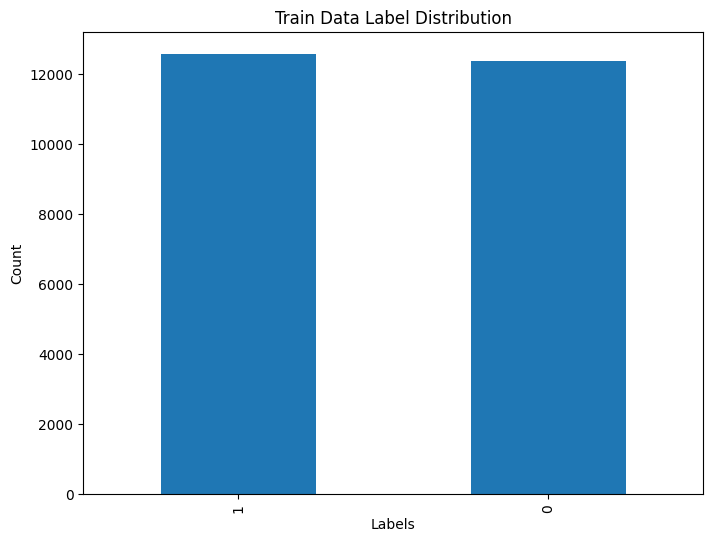

In [ ]:

# Create a pandas Series from the train_labels
train_labels_series = pd.Series(train_labels)

# Calculate the label counts
label_counts = train_labels_series.value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
label_counts.plot.bar()
plt.title('Train Data Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()


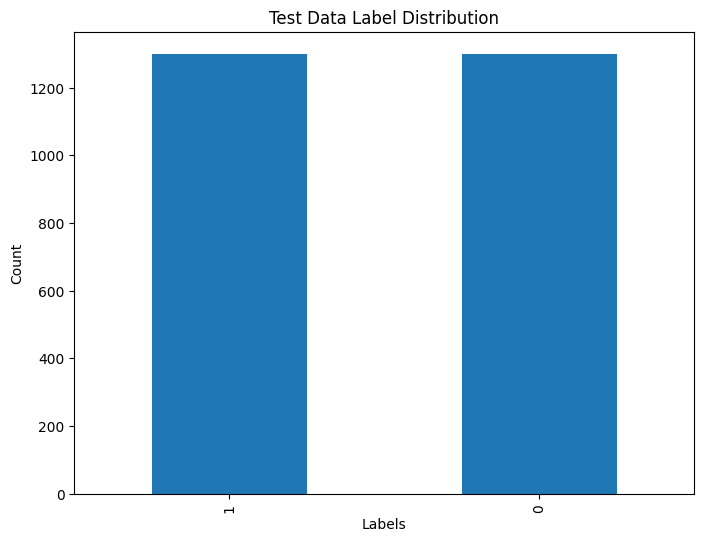

In [ ]:
# Create a pandas Series from the train_labels
test_labels_series = pd.Series(test_labels)

# Calculate the label counts
label_counts = test_labels_series.value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
label_counts.plot.bar()
plt.title('Test Data Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

####<b> Observations and insights: Please see bar plots.
For Train data there are 12582 images of Parasitized (value=1) cells and 12376 images of uninfected cells (value=0).
For Test data there are 1300 images of Parasitized cells (value=1) and 1300 images of uninfected cells (value=1).
They are both well balanced.

### <b>Data Exploration</b>
Visualize the images from the train data

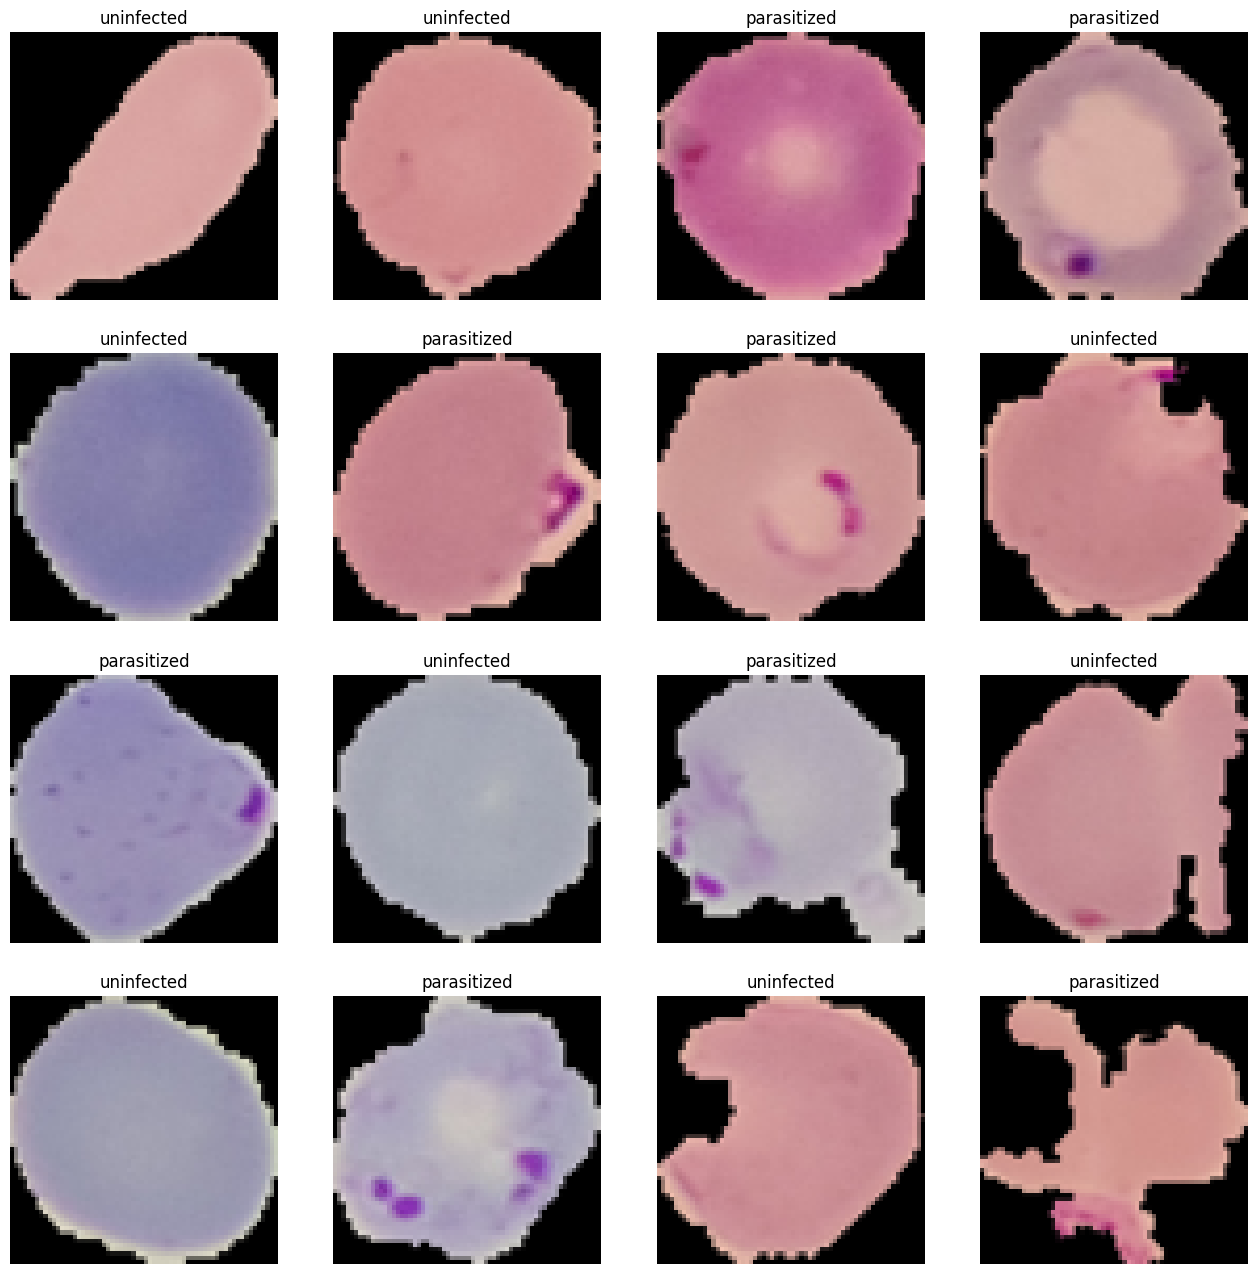

In [ ]:
# This code is to visualize both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

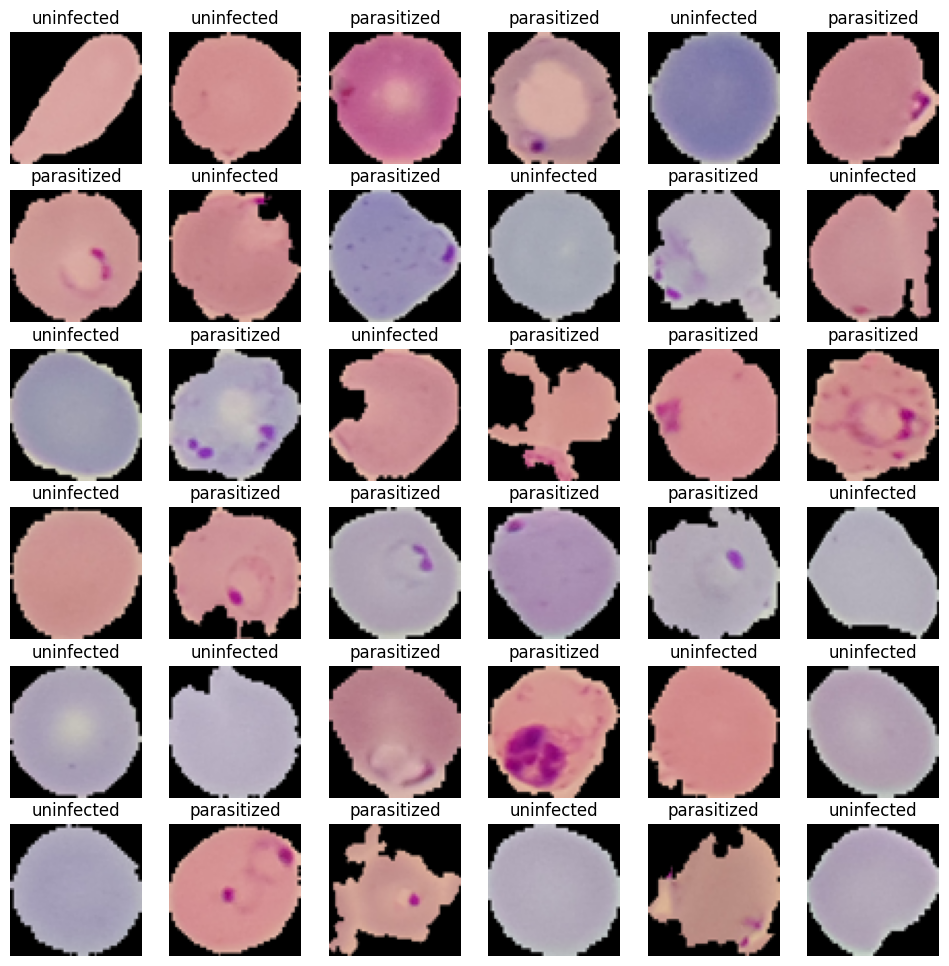

In [ ]:
# This code is to visualize both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')


###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)

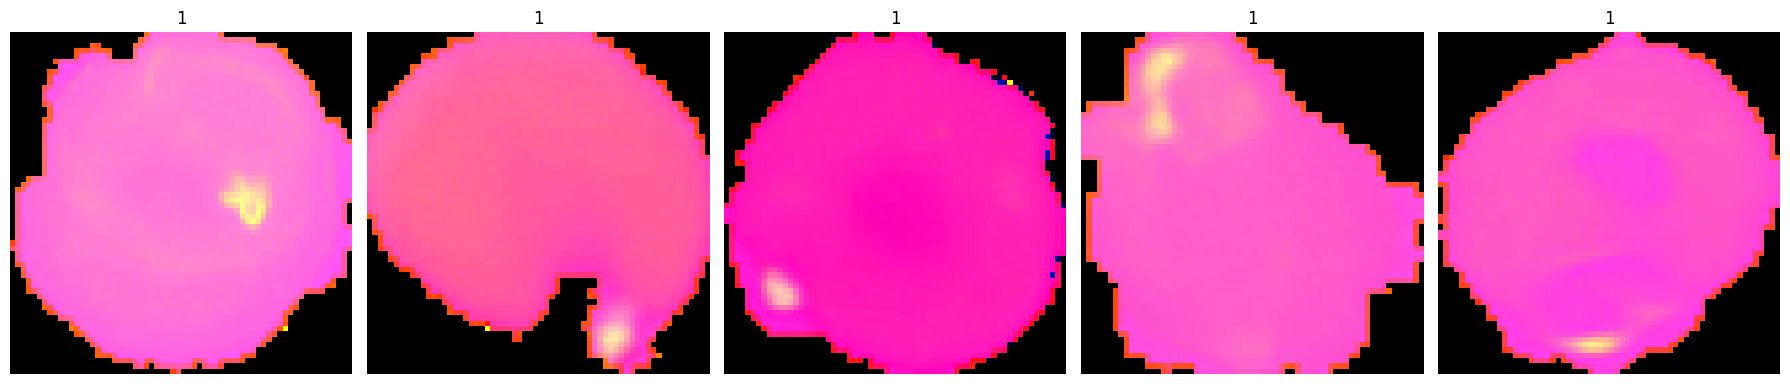

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Converting the test data

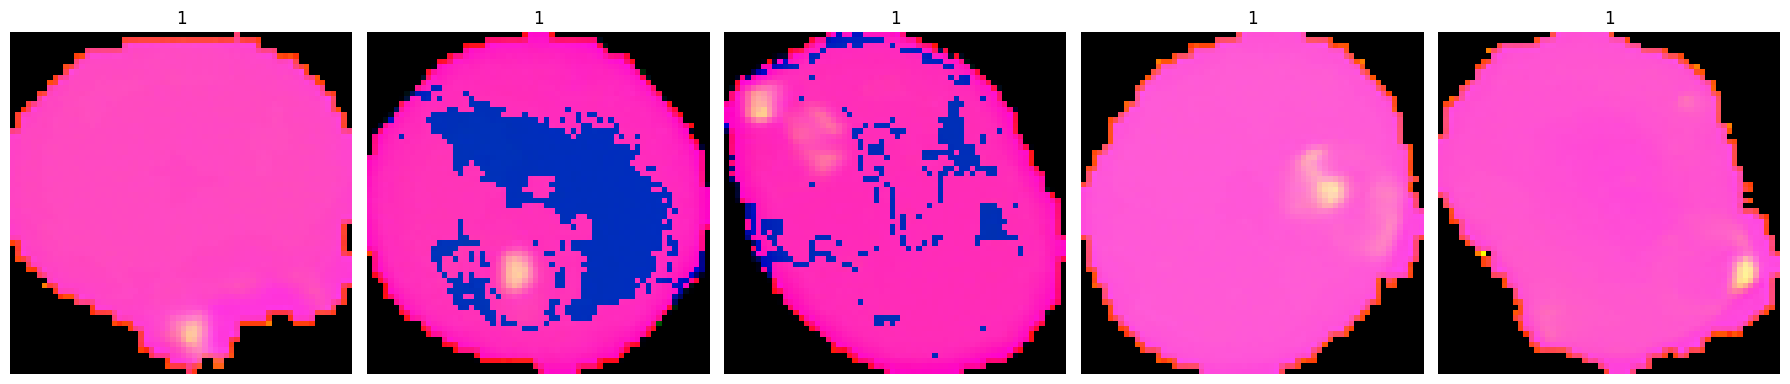

In [ ]:
# Similarly you can visualize for the images in the test data
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

####<b>Observations and insights: Using HSV is much easier to represent a color and extract a colored object from an image than using RGB color space.
Gaussian Blurring reduces the image noise and negligible details in the image. This method softens the image, blurs the edges, and increase the focus on color differences.
Looking at the sample views, Gaussian Blurring provides better view for detecting the parasitized cells than HSV.


###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

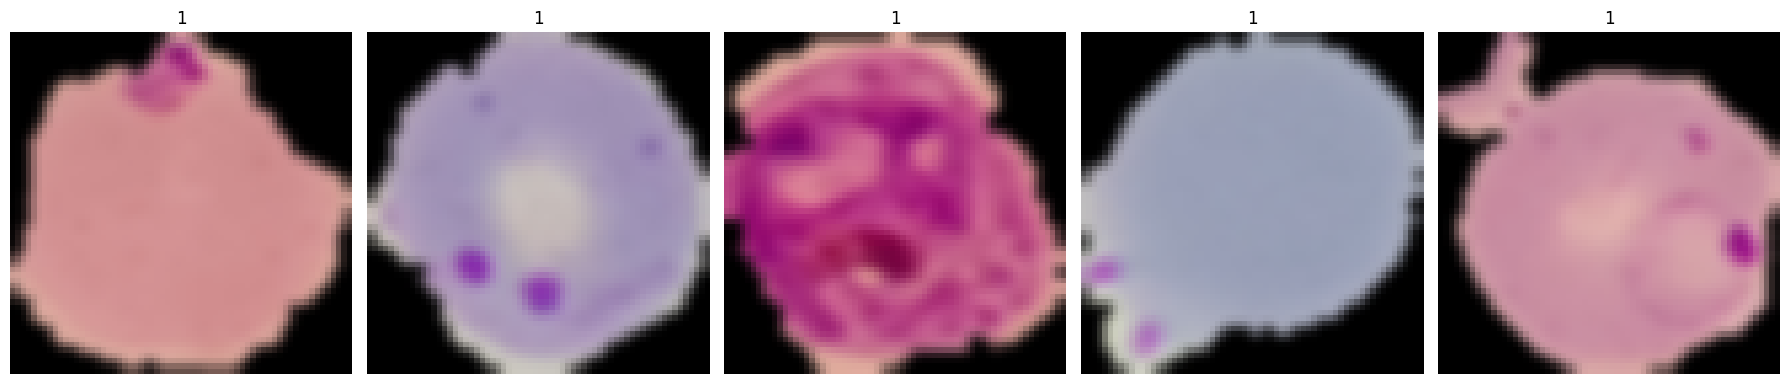

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Gaussian Blurring on test data

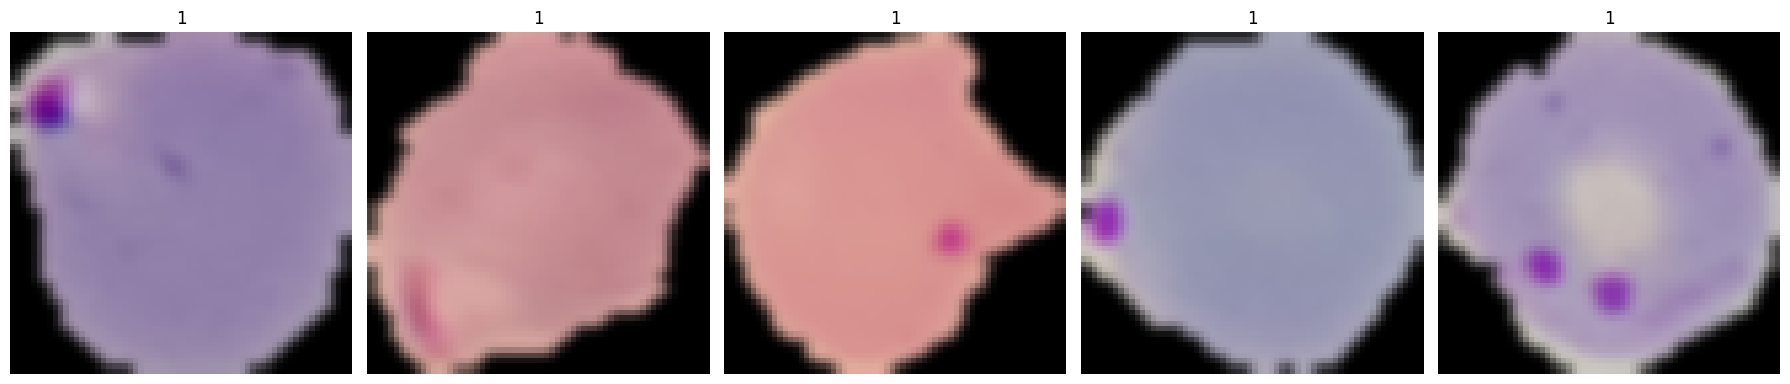

In [ ]:
# Similarly you can apply Gaussian blurring for the images in the test data
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

####**Observations and insights: Using HSV is much easier to represent a color and extract a colored object from an image than using RGB color space.
Gaussian Blurring reduces the image noise and negligible details in the image. This method softens the image, blurs the edges, and increase the focus on color differences.
Looking at the sample views, Gaussian Blurring provides better view for detecting the parasitized cells than HSV.
**

###<B>One Hot Encoding on the train and test labels

In [ ]:
from keras.utils import to_categorical
# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)
# WHY do we use it? our question is classification (infected/ uninfected) like 0 and 1. look it up... not clear.
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### **Base Model**


###<b> Importing the required libraries for building and training our Model

In [ ]:
from keras.utils.text_dataset import tf
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)
tf.random.set_seed(42)

In [ ]:
print(tf.__version__)

2.12.0


###<b> Building the model

In [ ]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
train_images[0][0][0]
train_labels[0][0]

0.0

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ]
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs =20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 128s 202ms/step - loss: 0.3805 - accuracy: 0.8257 - val_loss: 0.0889 - val_accuracy: 0.9415
Epoch 2/20
624/624 [==============================] - 126s 202ms/step - loss: 0.1274 - accuracy: 0.9489 - val_loss: 0.2550 - val_accuracy: 0.9085
Epoch 3/20
624/624 [==============================] - 121s 193ms/step - loss: 0.1093 - accuracy: 0.9636 - val_loss: 0.0702 - val_accuracy: 0.9926
Epoch 4/20
624/624 [==============================] - 120s 192ms/step - loss: 0.0850 - accuracy: 0.9735 - val_loss: 0.0937 - val_accuracy: 0.9808
Epoch 5/20
624/624 [==============================] - 118s 190ms/step - loss: 0.0718 - accuracy: 0.9766 - val_loss: 0.0676 - val_accuracy: 0.9832
Epoch 6/20
624/624 [==============================] - 118s 189ms/step - loss: 0.0679 - accuracy: 0.9776 - val_loss: 0.0536 - val_accuracy: 0.9870
Epoch 7/20
624/624 [==============================] - 122s 196ms/step - loss: 0.0671 - accuracy: 0.9769 - val_loss: 0.0595 -

###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 4s 42ms/step - loss: 0.0539 - accuracy: 0.9858

 Test_Accuracy:- 0.9857692122459412


<b> Plotting the confusion matrix

82/82 [==============================] - 4s 48ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1300
           1       0.98      0.99      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



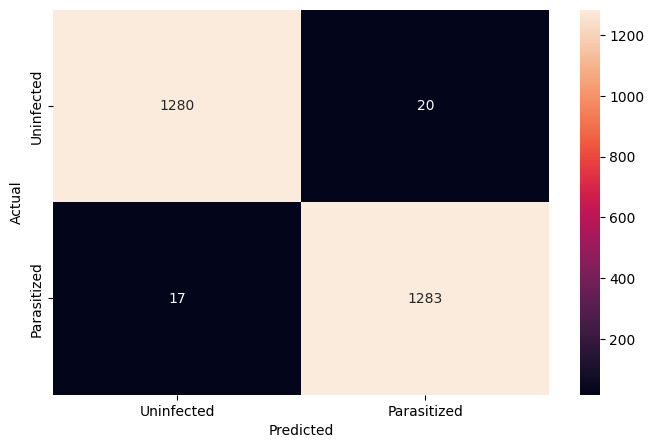

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

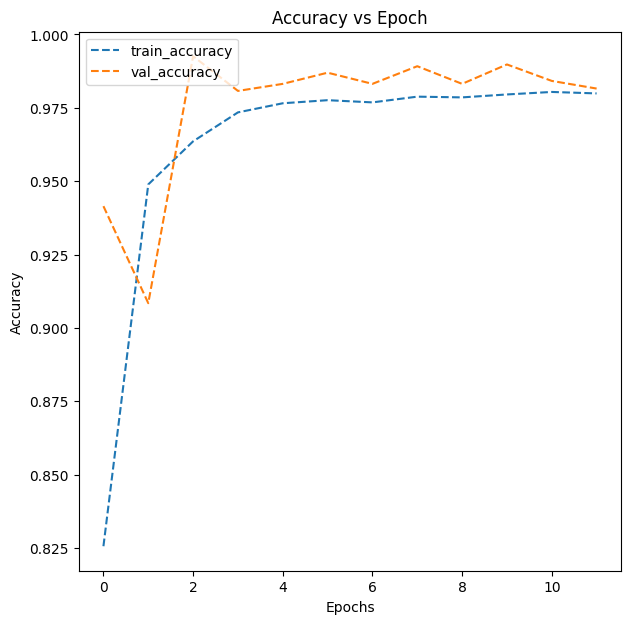

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing
* And we can also notice that validation accuracy is slightly higher than the train accuracy

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers
 WE WANT TO REDUCE FALSE NEGATIVE. Best approach is CNN because it it more specific to image.



In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
# Creating sequential model
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(2, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8

###<b> Compiling the model

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks,  validation_split = 0.2, epochs =10, verbose = 1)

Epoch 1/10
624/624 [==============================] - 141s 224ms/step - loss: 0.3911 - accuracy: 0.8228 - val_loss: 0.2130 - val_accuracy: 0.9044
Epoch 2/10
624/624 [==============================] - 144s 230ms/step - loss: 0.1600 - accuracy: 0.9398 - val_loss: 0.1431 - val_accuracy: 0.9423
Epoch 3/10
624/624 [==============================] - 141s 226ms/step - loss: 0.1102 - accuracy: 0.9596 - val_loss: 0.0664 - val_accuracy: 0.9900
Epoch 4/10
624/624 [==============================] - 143s 229ms/step - loss: 0.0888 - accuracy: 0.9676 - val_loss: 0.1065 - val_accuracy: 0.9764
Epoch 5/10
624/624 [==============================] - 136s 218ms/step - loss: 0.0671 - accuracy: 0.9750 - val_loss: 0.1074 - val_accuracy: 0.9659


###<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 7s 80ms/step - loss: 0.0954 - accuracy: 0.9696

 Test_Accuracy:- 0.9696153998374939


<b> Plotting the confusion matrix

82/82 [==============================] - 4s 50ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1300
           1       0.96      0.99      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



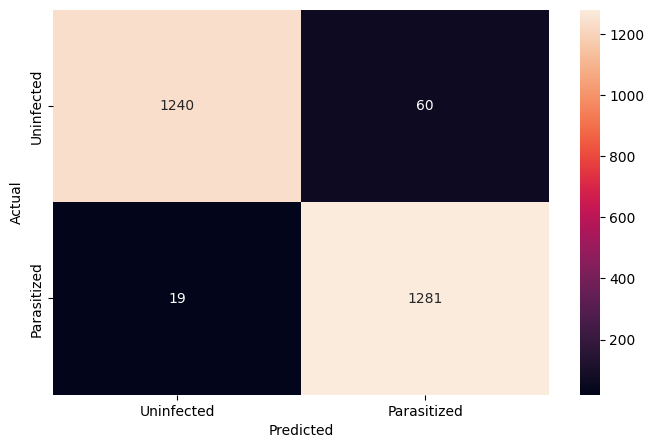

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

In [ ]:
# Function to plot train and validation accuracy
def plot_accuracy(history1):

    N = len(history1.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history1.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history1.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

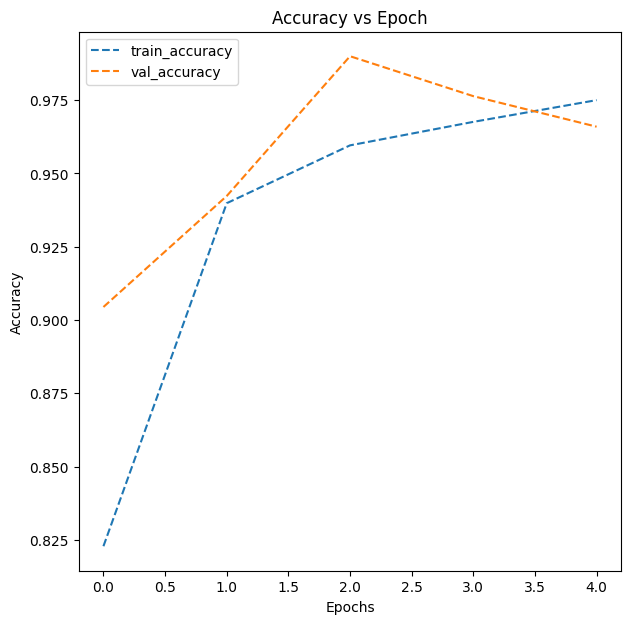

In [ ]:
plot_accuracy(history1)

###<b>Model 2</b><br>
Now let's build a model with LeakyRelu as the activation function
Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
#Complete this model using BatchNormalization layers and by using LeakyRelu as the activation function

#Importing the keras libraries and package
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

#Initializing the Convolutional Neural Network
model2 = Sequential()

#Layers and Filters
model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

model2.add(LeakyReLU(0.1))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(BatchNormalization())

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(512))

model2.add(LeakyReLU(0.1))

model2.add(Dropout(0.4))

model2.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4128      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                          

###<b>Compiling the model

In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 270s 430ms/step - loss: 0.3705 - accuracy: 0.8373 - val_loss: 0.0113 - val_accuracy: 0.9982
Epoch 2/20
624/624 [==============================] - 267s 429ms/step - loss: 0.1119 - accuracy: 0.9646 - val_loss: 0.1700 - val_accuracy: 0.9846
Epoch 3/20
624/624 [==============================] - 267s 429ms/step - loss: 0.0938 - accuracy: 0.9692 - val_loss: 0.1369 - val_accuracy: 0.9746


<b>Plotting the train and validation accuracy

In [ ]:
# Plotting the accuracies
# Function to plot train and validation accuracy
def plot_accuracy(history2):

    N = len(history2.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history2.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history2.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

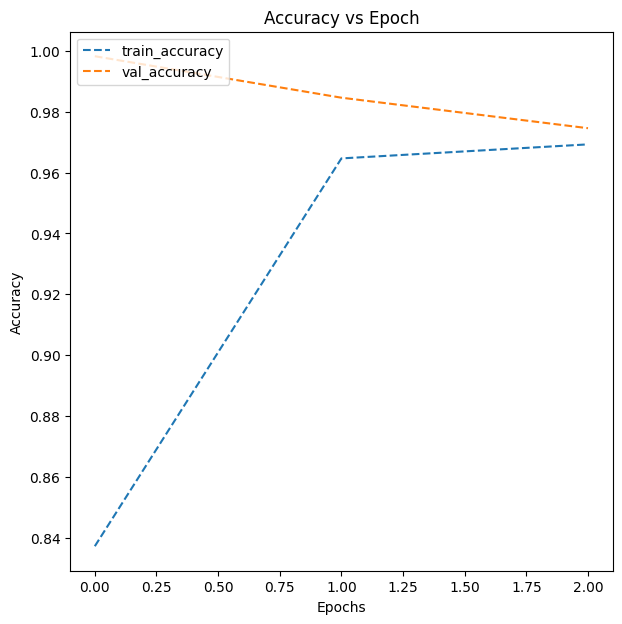

In [ ]:
plot_accuracy(history2)

###<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 11s 126ms/step - loss: 0.0926 - accuracy: 0.9800

 Test_Accuracy:- 0.9800000190734863


**Plotting the confusion matrix**

82/82 [==============================] - 9s 107ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



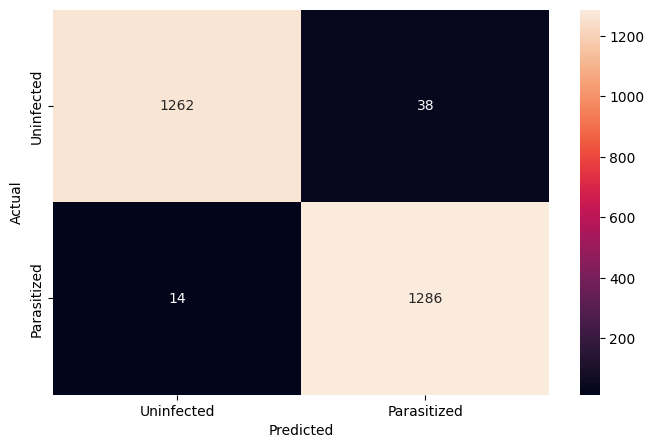

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

####<b>Observations and insights: ____

<b> Generate the classification report and confusion matrix

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(_______)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(________________, axis = 1)

# Printing the classification report
print(classification_report(______, _______))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(_____, _____)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###Model 3<br>

* Can we improve the model with Image Data Augmentation?





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

IndexError: ignored

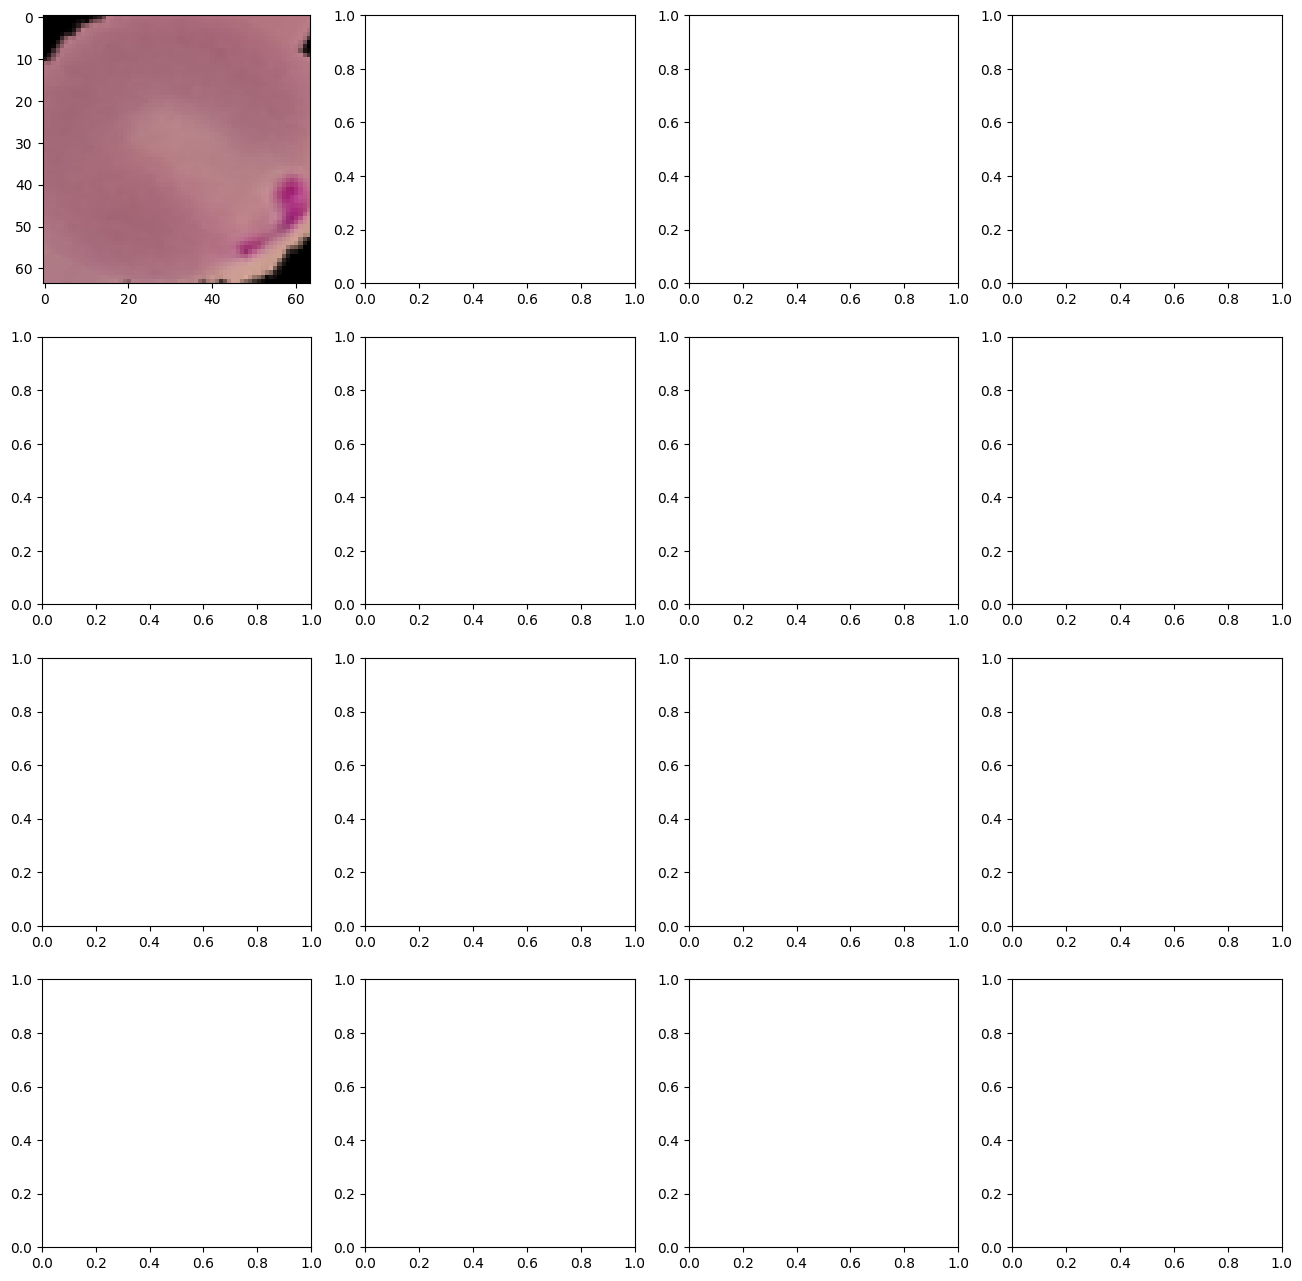

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1:

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights: ____

###<b>Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(512, activation = "relu"))

model3.add(Dropout(0.4))

model3.add(Dense(2, activation = "sigmoid")) # 2 represents output layer neurons
# Use this as the optimizer
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator,
                                  validation_data = val_generator,
                                  batch_size = 32, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20


ValueError: ignored

###<B>Evaluating the model

<b>Plot the train and validation accuracy

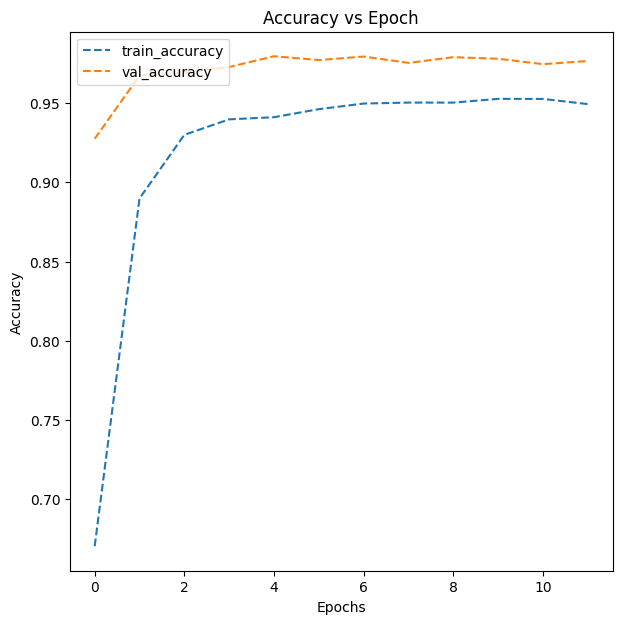

In [ ]:
# Plotting the accuracies
# Function to plot train and validation accuracy
def plot_accuracy(history3):

    N = len(history3.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history3.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history3.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(X_val,y_val, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

156/156 [==============================] - 9s 55ms/step - loss: 0.0698 - accuracy: 0.9766

 Test_Accuracy:- 0.9765625


<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 3s 38ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



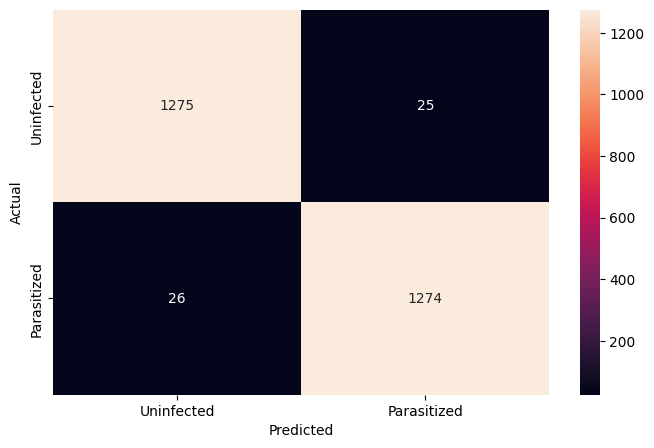

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Model 4: Try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax') (x)

model4 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [ ]:
# Compiling the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            test_images, test_labels,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/10
65/65 [==============================] - 154s 2s/step - loss: 0.2053 - accuracy: 0.9317 - val_loss: 0.5462 - val_accuracy: 0.7442
Epoch 2/10
65/65 [==============================] - 170s 3s/step - loss: 0.1886 - accuracy: 0.9279 - val_loss: 0.2769 - val_accuracy: 0.8885
Epoch 3/10
65/65 [==============================] - 147s 2s/step - loss: 0.1730 - accuracy: 0.9332 - val_loss: 0.2379 - val_accuracy: 0.9192
Epoch 4/10
65/65 [==============================] - 149s 2s/step - loss: 0.1453 - accuracy: 0.9505 - val_loss: 0.1585 - val_accuracy: 0.9558
Epoch 5/10
65/65 [==============================] - 148s 2s/step - loss: 0.1453 - accuracy: 0.9413 - val_loss: 0.0662 - val_accuracy: 0.9827
Epoch 6/10
65/65 [==============================] - 148s 2s/step - loss: 0.1439 - accuracy: 0.9476 - val_loss: 0.0933 - val_accuracy: 0.9712
Epoch 7/10
65/65 [==============================] - 147s 2s/step - loss: 0.1191 - accuracy: 0.9596 - val_loss: 0.1574 - val_accuracy: 0.9462


<b>Plot the train and validation accuracy

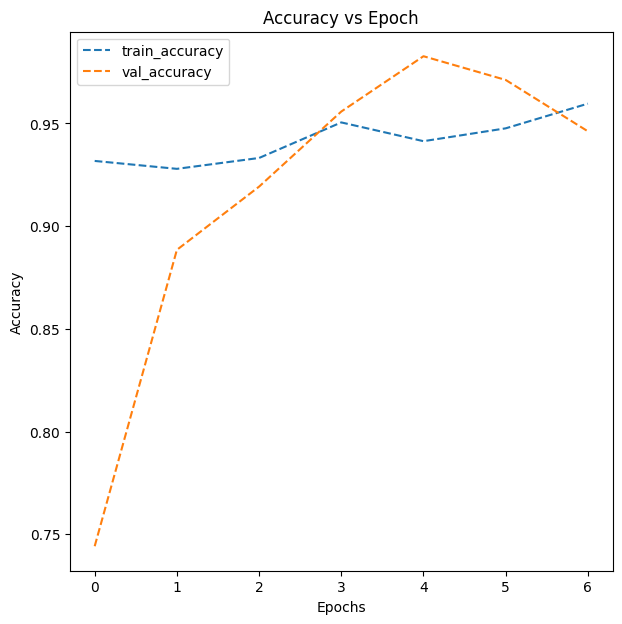

In [ ]:
# plotting the accuracies

plot_accuracy(history4)

###**Observations and insights: _____**

*   What can be observed from the validation and train curves?

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy = model4.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])


82/82 [==============================] - 137s 2s/step - loss: 0.1074 - accuracy: 0.9700

 Test_Accuracy:- 0.9700000286102295


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 136s 2s/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1300
           1       0.98      0.96      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



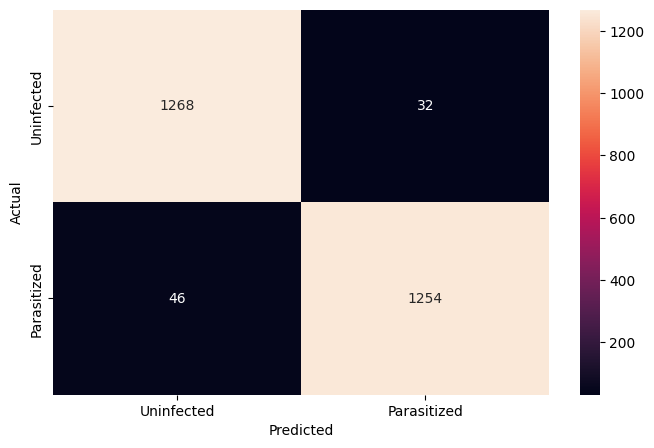

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

#### Proposal for the final solution design:
Model 2 is the proposed solution design.
*	The test accuracy rate is 98% and f1-score if 98%. 
*	Changed activation function to LeakyRelu and used BatchNormalization
*	Model stops training at 3/20 due to no improvement. 
*	Below are the confusion matrix and accuracy plot.
	  * False Negatives: 14 out of 1300 
	  * False Positives: 38 out of 1300
	  * Test accuracy merging with the train accuracy as epochs progress.